## Linear regression analysis of genes associated with mechanical properties of cells

- Perform linear regression of gene expression against pressure and stress tensor magnitude
- Correct for multiple hypothesis testing
- Pass on to R code for nice volcano plots (TODO)

In [14]:
# For testing purposes only

import importlib
import helper_functions
importlib.reload(helper_functions)

<module 'helper_functions' from '/Users/ruiyanghe/Desktop/Uni/PartIII/Project/TensionMap-new/notebooks/reproduce_results/helper_functions.py'>

Module imports

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from helper_functions import *

Select dataset - can be one of embryo1_brain, embryo2_brain, embryo2_fmh, embryo2_dorsal

In [6]:
dataset = 'embryo1_brain'

Data import

In [7]:
# Gene expression matrix, cell adjacency matrix, force imputation results
gex_res = pd.read_csv(f'../../reproduce_data/{dataset}/gex_res.csv', index_col=0)
adj_mat = pd.read_csv(f'../../reproduce_data/{dataset}/adj_mat.csv', index_col=0)
tensionmap_data = pd.read_csv(f'../../reproduce_data/{dataset}/tensionmap_res.csv', index_col=0)

Preprocess data for regression

In [12]:
force_features = ['pressure','stresstensor_anisotropy','stresstensor_eigval1','stresstensor_eigval2','stresstensor_orientation']
force_res = tensionmap_data[force_features]
force_res.insert(force_res.shape[1],'stresstensor_magnitude', force_res['stresstensor_eigval1'] + force_res['stresstensor_eigval2'])

Do regression across entire region

In [16]:
expressed_genes = gex_res.index.values[gex_res.apply(lambda x: np.sum(x>0), axis=1) > 0.5*gex_res.shape[1]]
reg_res, perm_res = linear_regressions(gex_res.loc[expressed_genes,:], force_res)

100%|██████████| 13018/13018 [00:45<00:00, 283.07it/s]


Correct for multiple hypothesis testing

In [17]:
reg_res['p_pval_adj'] = sm.stats.multipletests(reg_res['p_pval'].values, 0.1, method='fdr_bh')[1]
reg_res['sm_pval_adj'] = sm.stats.multipletests(reg_res['sm_pval'].values, 0.1, method='fdr_bh')[1]

Generate plots for pressure and stress tensor magnitude
- Density plot t-statistics
- Histogram of p-values

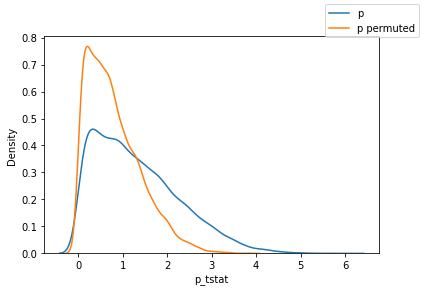

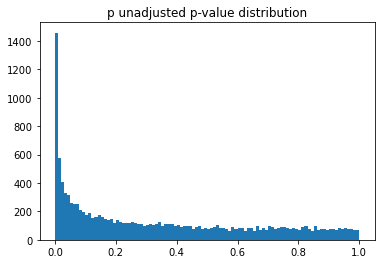

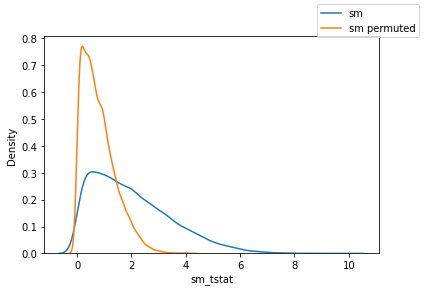

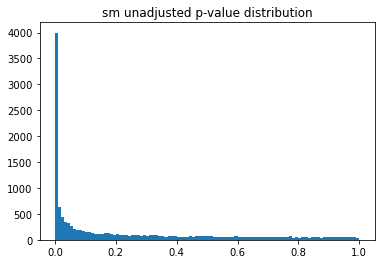

In [19]:
for feature in ['p','sm']:
    # Generate t-statistic density plot
    fig2 = plt.figure()
    sns.kdeplot(np.abs(reg_res[f'{feature}_tstat']))
    sns.kdeplot(np.abs(perm_res[f'{feature}_tstat']))
    fig2.legend(labels=[f'{feature}', f'{feature} permuted','mechanosensitive geneset'])
    plt.show()

    # Generate p-value histogram
    fig3 = plt.figure()
    plt.hist(reg_res[f'{feature}_pval'], bins=100)
    plt.title(f'{feature} unadjusted p-value distribution')
    plt.show()